In [42]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

In [43]:
wb = openpyxl.load_workbook('Results.xlsx')
ws = wb['RRT Star']

In [44]:
k_vals = []; num_iters = []; times = []; costs = []
for i in range(52,102):
    k_vals.append(ws.cell(i,5).value)
    num_iters.append(ws.cell(i,6).value)
    times.append(ws.cell(i,7).value)
    costs.append(ws.cell(i,8).value)

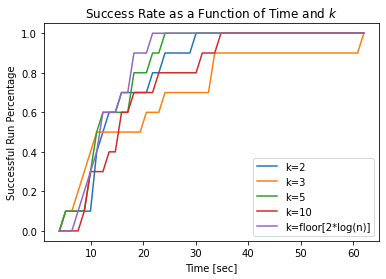

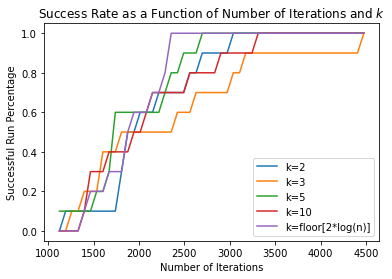

In [45]:
t = np.linspace(int(min(times)), int(np.ceil(max(times))))

for k in range(5):
    counts = [0]*t
    for i in range(len(t)):
        for j in range(k*10,k*10+10):
            if times[j] <= t[i]:
                counts[i] += 1
    plt.plot(t, counts/10, label=f'k={k_vals[j]}')
plt.xlabel("Time [sec]")
plt.ylabel("Successful Run Percentage")
plt.title("Success Rate as a Function of Time and $k$")
plt.legend()
plt.show()

iter = np.linspace(int(min(num_iters)), int(np.ceil(max(num_iters))))

for k in range(5):
    counts = [0]*iter
    for i in range(len(iter)):
        for j in range(k*10,k*10+10):
            if num_iters[j] <= iter[i]:
                counts[i] += 1
    plt.plot(iter, counts/10, label=f'k={k_vals[j]}')
plt.xlabel("Number of Iterations")
plt.ylabel("Successful Run Percentage")
plt.title("Success Rate as a Function of Number of Iterations and $k$")
plt.legend()
plt.show()

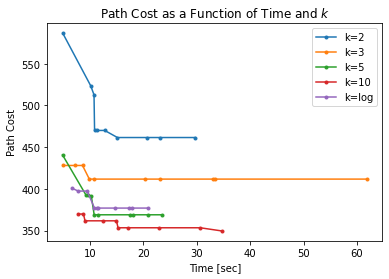

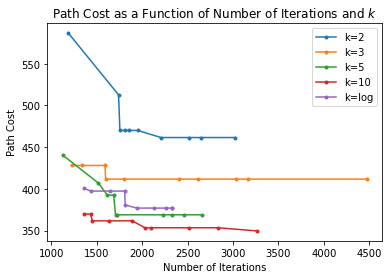

In [46]:
labels = ['k=2','k=3','k=5','k=10','k=log']
for k in range(5):
    t = times[k*10:k*10+10]
    c = costs[k*10:k*10+10]
    times_sorted = sorted(t)
    costs_sorted = [x for _,x in sorted(zip(t,c))]
    c_min = 1000
    for j in range(len(costs_sorted)):
        if costs_sorted[j]<c_min:
            c_min=costs_sorted[j]
        else:
            costs_sorted[j]=c_min
    plt.plot(times_sorted, costs_sorted, label=labels[k], marker='.')
plt.xlabel("Time [sec]")
plt.ylabel("Path Cost")
plt.title("Path Cost as a Function of Time and $k$")
plt.legend()
plt.show()

for k in range(5):
    i = num_iters[k*10:k*10+10]
    c = costs[k*10:k*10+10]
    iter_sorted = sorted(i)
    costs_sorted = [x for _,x in sorted(zip(i,c))]
    c_min = 1000
    for j in range(len(costs_sorted)):
        if costs_sorted[j]<c_min:
            c_min=costs_sorted[j]
        else:
            costs_sorted[j]=c_min
    plt.plot(iter_sorted, costs_sorted, label=labels[k], marker='.')
plt.xlabel("Number of Iterations")
plt.ylabel("Path Cost")
plt.title("Path Cost as a Function of Number of Iterations and $k$")
plt.legend()
plt.show()